### Machine Learning vs Deep Learning
- ANN : 인공신경망, 모든 비선형 함수를 학습
- SLP : 단층 퍼셉트론(Single Layer Perceptron). 입력층,출력층
- MLP : 다층 퍼셉트론(Multi Layer Perceptron). 1개 이상의 은닉층을 보유, 일반적으로 지도학습(역전파. 경사하강법을 통해 손실율을 0에 가깝게 함)
- DNN : 심층 신경망, ANN의 문제를 해결하기 위함(여러 레이어를 활성함수를 통해 분류모델로 분석을 최적화시킴)
- CNN : 합성곱 신경망(Convolution). 이미지 및 비디오 처리에 활용
- RNN : 순환 신경망, 순차 데이터(순서를 가진 데이터)를 처리 - 언어번역(어순), 시계열 데이터

'다소 부족하지만 괜찮았어'
뒷부분이 중요하지만, 앞부분도 무시할 수 없음
그전의 기억을 유지해야함

RNN -> LSTM
Recurrent Neural Networks(RNN)
Long Short-Term Memory models(LSTM)

MLP - (ANN, SLP, MLP, DNN) 묶어서 보기도 함

![image](https://user-images.githubusercontent.com/58851945/119585053-deada280-be04-11eb-92f8-54bfa3a12ec8.png)

뉴런 => 셀
특성맵 => 은닉상태 (순환층에서 만들어진 것)
활성화함수(시그모이드,렐루..) => tan(h) : 시그모이드와 유사. (-1 ~ 1)

리뷰. 감성(감정)분석

순환 이전의 계산은 정방향계산(피드포워드 feed foward 신경망)
순환신경망은 피드포워드가 아님

이전의 데이터를 재사용

O_A =>  A : 타임스탬프 (처리하는 각 단계)

'Hello Deep Learning'  : 샘플
타임스탬프 : 샘플을 처리하는 단계

In [1]:
a='Hello Deep Learning'
len(a)  # 타임스탬프가 처리하는 단위가 '글자'라면 19단계가 됨

19

In [2]:
from tensorflow.keras.datasets import imdb

# 단어 500개만 사용
(train_input, train_target), (test_input, test_target) = \
imdb.load_data(num_words=500)

print(train_input.shape, test_input.shape)

C:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


(25000,) (25000,)


C:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
# 첫번째 리뷰의 길이 : 218개의 토큰으로 이루어져있다
len(train_input[0]) 

218

In [4]:
len(train_input[1])

189

In [5]:
# 리뷰의 감정분석 : 긍정(1), 부정(0)
train_target[:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [6]:
# 검증세트
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = \
train_test_split(train_input, train_target, test_size=.2, random_state=42)

import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))  # 리뷰마다 사용된 단어(글자?) 개수 평균,중간값

239.00925 178.0


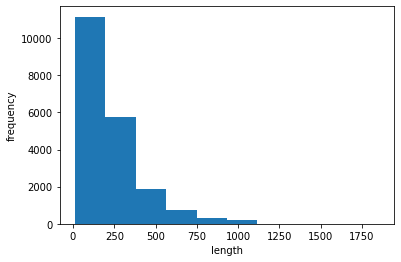

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

- 모든 리뷰의 길이를 100에 맞추기 위해 패딩을 수행한다.
- zero-padding(0)

In [8]:
# 시퀀스 데이터의 길이를 맞추는 함수 : pad_sequences()
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
train_seq.shape

(20000, 100)

In [9]:
print(train_seq[0])  # 패딩0 이 안들어있으므로 리뷰단어 100개가 넘어서 짤린듯하다

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [10]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [11]:
print(train_seq[5])  # 결정적인 얘기는 뒷부분에 하는 경우가 많아서, 패딩을 앞에 추가

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [12]:
val_seq = pad_sequences(val_input, maxlen=100)  # 검증데이터 패딩

### 순환 신경망 만들기

In [13]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))  # 은닉층-순환신경망(단순)
model.add(keras.layers.Dense(1, activation='sigmoid'))

큰 수가 영향이 크다(중요하다)고 오해할 수 있어서
큰 수의 속성을 제거하기위해 '원핫인코딩'을 함 (to_categorical)

500개의 단어 -> 500에 맞게 원핫인코딩함

In [14]:
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)  # input_shape=(100,500) 의 의미

(20000, 100, 500)


In [15]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [16]:
print(np.sum(train_oh[0][0]))

1.0


In [17]:
val_oh = keras.utils.to_categorical(val_seq)

In [18]:
# 모델 정보 확인
model.summary()
# 500개 차원 8개뉴런 (500x8) # 8개 각각 타임스탬프 8x8=64 (가중치) # 8개 편향 8  == 4072

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


학습률(learning_rate) : 1e-4 = 0.0001  
rmsprop값을 변수로 뺀건, 커스텀 가능한걸 보여주기위함  
기본 학습률은 0.001 (1e-3)  
=> 최적화 커스텀

In [21]:
# default = 0.001
# 0.0001로 바꾸로 싶어서 별고 객체를 빼낸다
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# 복구점
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')

# 조기종료
# patience=3 - 손실율이 3번 이상 내려가지 않을때 종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, 
                                                  restore_best_weights=True)

# history라는 딕셔너리 객체 반환 밑의 history 변수라는 건 다름
history = model.fit(train_oh, train_target, epochs=100, batch_size = 64,
                    validation_data=(val_oh, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 15s 728us/sample - loss: 0.6993 - accuracy: 0.5027 - val_loss: 0.6993 - val_accuracy: 0.5000
Epoch 2/100
20000/20000 [==============================] - 12s 618us/sample - loss: 0.6952 - accuracy: 0.5149 - val_loss: 0.6966 - val_accuracy: 0.5110
Epoch 3/100
20000/20000 [==============================] - 12s 598us/sample - loss: 0.6926 - accuracy: 0.5228 - val_loss: 0.6947 - val_accuracy: 0.5194
Epoch 4/100
20000/20000 [==============================] - 12s 597us/sample - loss: 0.6905 - accuracy: 0.5289 - val_loss: 0.6930 - val_accuracy: 0.5236
Epoch 5/100
20000/20000 [==============================] - 12s 600us/sample - loss: 0.6886 - accuracy: 0.5343 - val_loss: 0.6913 - val_accuracy: 0.5250
Epoch 6/100
20000/20000 [==============================] - 12s 624us/sample - loss: 0.6864 - accuracy: 0.5489 - val_loss: 0.6889 - val_accuracy: 0.5266
Epoch 7/100
20000/20000 [==============

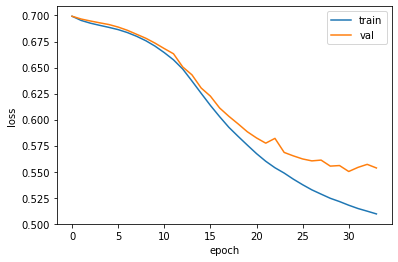

In [23]:
# 훈련손실과 검증손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [24]:
print(train_seq.nbytes, train_oh.nbytes)  # 500배

8000000 4000000000


원핫인코딩 -> 많은 기억공간을 차지함  
-> 원핫인코딩 대신 임베딩 사용 (각각의 단어를 고정 크기의 실수 벡터로 변환)

### 단어 임베딩 처리

In [26]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
# 사용할 단어(500개), 임베딩크기(원핫인코딩보다 작게. 16~20정도 씀) 16개 벡터 배열?
# input_shape대신 length사용 : 입력데이터(패딩한 샘플 크기 -> 100)의 길이
model2.add(keras.layers.SimpleRNN(8)) # 8개층
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [29]:
# default = 0.001
# 0.0001로 바꾸로 싶어서 별고 객체를 빼낸다
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# 복구점
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model2.h5')

# 조기종료
# patience=3 - 손실율이 3번 이상 내려가지 않을때 종료
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, 
                                                  restore_best_weights=True)

# history라는 딕셔너리 객체 반환 밑의 history 변수라는 건 다름
history = model2.fit(train_seq, train_target, epochs=100, batch_size = 64,
                    validation_data=(val_seq, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 7s 360us/sample - loss: 0.6804 - accuracy: 0.5584 - val_loss: 0.6430 - val_accuracy: 0.6534
Epoch 2/100
20000/20000 [==============================] - 6s 298us/sample - loss: 0.6186 - accuracy: 0.6864 - val_loss: 0.6026 - val_accuracy: 0.7058
Epoch 3/100
20000/20000 [==============================] - 6s 287us/sample - loss: 0.5828 - accuracy: 0.7300 - val_loss: 0.5794 - val_accuracy: 0.7250
Epoch 4/100
20000/20000 [==============================] - 6s 285us/sample - loss: 0.5560 - accuracy: 0.7516 - val_loss: 0.5529 - val_accuracy: 0.7508
Epoch 5/100
20000/20000 [==============================] - 6s 285us/sample - loss: 0.5344 - accuracy: 0.7677 - val_loss: 0.5373 - val_accuracy: 0.7560
Epoch 6/100
20000/20000 [==============================] - 6s 297us/sample - loss: 0.5170 - accuracy: 0.7761 - val_loss: 0.5191 - val_accuracy: 0.7698
Epoch 7/100
20000/20000 [====================

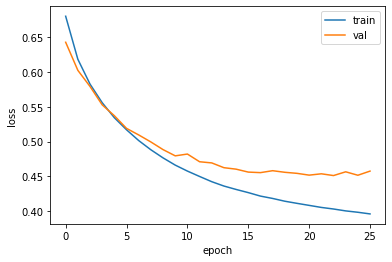

In [30]:
# 훈련손실과 검증손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()